<a href="https://colab.research.google.com/github/nikpaw/my_first_repo/blob/main/Dataframes_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing basic modules
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
# import file "foreign_data_by_state_sorted.csv"
from google.colab import files
uploaded = files.upload()

Saving foreign_data_by_state_sorted.csv to foreign_data_by_state_sorted.csv


In [3]:
import io
foreign_data_complete = pd.read_csv(io.BytesIO(uploaded['foreign_data_by_state_sorted.csv']), encoding="windows_1258")

foreign_data_complete = foreign_data_complete.drop([0])

foreign_data_complete = foreign_data_complete.rename(
    columns={
        "Foreign_Population": "Foreign_Population.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )

In [10]:
# import file "migrant_background_data_by_state_sorted"
from google.colab import files
uploaded = files.upload()

Saving migrant_background_data_by_state_sorted.csv to migrant_background_data_by_state_sorted (1).csv


In [11]:
import io
migrant_background_data_complete = pd.read_csv(io.BytesIO(uploaded['migrant_background_data_by_state_sorted.csv']), encoding="windows_1258")

migrant_background_data_complete = migrant_background_data_complete.drop([0])

migrant_background_data_complete = migrant_background_data_complete.rename(
    columns={
        "Population with migrant background": "Population with migrant background.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )

In [12]:
# import file "geographical_data_by_state_sorted"
from google.colab import files
uploaded = files.upload()

Saving geographical_data_by_state_sorted.csv to geographical_data_by_state_sorted (1).csv


In [13]:
import io
geography_data_complete = pd.read_csv(io.BytesIO(uploaded['geographical_data_by_state_sorted.csv']), encoding="windows_1258")
geography_data_complete = geography_data_complete.drop([0])

geography_data_complete = geography_data_complete.rename(
    columns={
        "Distance": "Distance.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )

In [14]:
blank_df = pd.DataFrame(
    {
    "Baden-Württemberg": [],
    "Bavaria": [],
    "Berlin": [],
    "Brandenburg": [],
    "Bremen": [],
    "Hamburg": [],
    "Hesse": [],
    "Mecklenburg Western Pomerania": [],
    "Lower Saxony": [],
    "Northrhine-Westphalia": [],
    "Rhineland Palatinate": [],
    "Saarland": [],
    "Sachsen": [],
    "Sachsen-Anhalt": [],
    "Schleswig-Holstein": [],
    "Thuringia": []
    }
)

blank_df = blank_df.T

In [16]:
central_table_renamed_filtered_1 = blank_df.join(migrant_background_data_complete, rsuffix='_migrant')
central_table_renamed_filtered_1 = central_table_renamed_filtered_1.add_suffix('_migrant')

central_table_renamed_filtered_2 = blank_df.join(foreign_data_complete, rsuffix='_foreign')
central_table_renamed_filtered_2 = central_table_renamed_filtered_2.add_suffix('_foreign')

central_table_renamed_filtered_3 = blank_df.join(geography_data_complete, rsuffix='_geography')
central_table_renamed_filtered_3 = central_table_renamed_filtered_3.add_suffix('_geography')

central_table_migrant_background_foreign = central_table_renamed_filtered_1.join(central_table_renamed_filtered_2)

central_table_migrant_background_foreign_geography = central_table_migrant_background_foreign.join(central_table_renamed_filtered_3)

In [17]:
#Upload Data_Abortion_state.csv
from google.colab import files
uploaded = files.upload()

Saving Data_Abortion_state.csv to Data_Abortion_state.csv


In [19]:
import io
df_abortion_state = pd.read_csv(io.BytesIO(uploaded['Data_Abortion_state.csv']) ,encoding="windows_1258")
df_abortion_state = df_abortion_state.rename(index = {
    0: 'Baden-Württemberg',
    1: 'Bavaria',
    2: 'Berlin',
    3: 'Brandenburg',
    4: 'Bremen',
    5: 'Hamburg',
    6: 'Hesse',
    7: 'Mecklenburg Western Pomerania',
    8: 'Lower Saxony',
    9: 'Northrhine-Westphalia',
    10: 'Rhineland Palatinate',
    11: 'Saarland',
    12: 'Sachsen',
    13: 'Sachsen-Anhalt',
    14: 'Schleswig-Holstein',
    15: 'Thuringia'},
  columns = {
       "Ausland" : "Foreign"
       }
    )

In [22]:
column_names = list(df_abortion_state.columns)
df_abortion_total = df_abortion_state.convert_dtypes()
df_abortion_total['Germans_total']= df_abortion_state[column_names[:-1]].sum(axis=1)
df_abortion_total = df_abortion_total.rename(index={
    0: 'Baden-Württemberg',
    1: 'Bavaria',
    2: 'Berlin',
    3: 'Brandenburg',
    4: 'Bremen',
    5: 'Hamburg',
    6: 'Hesse',
    7: 'Mecklenburg Western Pomerania',
    8: 'Lower Saxony',
    9: 'Northrhine-Westphalia',
    10: 'Rhineland Palatinate',
    11: 'Saarland',
    12: 'Sachsen',
    13: 'Sachsen-Anhalt',
    14: 'Schleswig-Holstein',
    15: 'Thuringia'}
    )
df_abortion_total = df_abortion_total.filter(items = ["Foreign", "Germans_total"])
df_abortion_total = df_abortion_total.fillna(0)

In [28]:
#Add the abortion information of each state into the dataframe
central_table_migrant_background_foreign_geography["abortions_total"] = df_abortion_total["Germans_total"]
central_table_migrant_background_foreign_geography["abortions_foreign"] = df_abortion_total["Foreign"]
central_table_migrant_background_foreign_geography["abortions_local"] = df_abortion_total["Germans_total"] - df_abortion_total["Foreign"]
central_table_migrant_background_foreign_geography["abortions_type"] = ""

#Create DataFrame containing the rows for the foreign abortions in Germany
central_table_migrant_background_foreign_geography_aforeign = central_table_migrant_background_foreign_geography.loc[central_table_migrant_background_foreign_geography.index.repeat(central_table_migrant_background_foreign_geography.abortions_foreign)]
central_table_migrant_background_foreign_geography_aforeign.abortions_type = 1

#Create DataFrame containing the rows for the foreign abortions in Germany
central_table_migrant_background_foreign_geography_alocal = central_table_migrant_background_foreign_geography.loc[central_table_migrant_background_foreign_geography.index.repeat(central_table_migrant_background_foreign_geography.abortions_local)]
central_table_migrant_background_foreign_geography_alocal.abortions_type = 0

info = [central_table_migrant_background_foreign_geography_aforeign,central_table_migrant_background_foreign_geography_alocal]
central_table_migrant_background_foreign_geography_repeated = pd.concat(info)

In [29]:
# possibility to download the generated Data Frame
central_table_migrant_background_foreign_geography_repeated.to_csv('central_table_migrant_background_foreign_geography_repeated.csv') 
from google.colab import files
files.download("central_table_migrant_background_foreign_geography_repeated.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Central Table with the NAs replaced by 0 since in our case NA means to small to measure (wihle other populations are represented by small single digit numbers)


In [30]:
No_NA_central_table = central_table_migrant_background_foreign_geography_repeated.fillna(0)

In [ ]:
# possibility to download the generated Data Frame without NAs
No_NA_central_table.to_csv('No_NA_central_table.csv') 
from google.colab import files
files.download("No_NA_central_table.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Basic Model Creation

In [32]:
# Delete string variable country code
No_NA_central_table_no_ISO3 = No_NA_central_table[No_NA_central_table.columns.drop(list(No_NA_central_table.filter(regex = "Country.")))]

# Set X and y values with our own data
X = No_NA_central_table_no_ISO3.drop(["abortions_foreign",	"abortions_local",	"abortions_type"], axis=1)
y = No_NA_central_table_no_ISO3["abortions_type"]

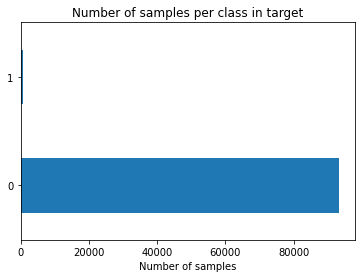

In [35]:
# Plot distribution of y
# y is etremely uneven distributed
import matplotlib.pyplot as plt

y.value_counts().plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Number of samples per class in target")

In [36]:
# Set up training and testing data
from sklearn.model_selection import train_test_split
# TBA: set sub parameters (testsize etc.)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, random_state=123, test_size=0.5)

## Dummy Model

In [38]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)
print(f"Accuracy Dummy Classifier: "
      f"{dummy_classifier.score(X_test, y_test):.3f}")

Accuracy Dummy Classifier: 0.994


## Logistic Regression

In [39]:
# Create Logistic Regression Model
from sklearn.linear_model import LogisticRegression

classifier_no_weights = LogisticRegression(max_iter= 1000)
classifier_no_weights.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
# LogisticRegression .score for the unweighted model for accuracy metrics
# Accuracy score is extremely high (which is a suspicious) 
classifier_no_weights.score(X_test, y_test)

0.9937889519920022

In [44]:
# Using 'balanced accuracy' metric (for binary and multiclass classification problems with imbalanced datasets)
# Definition: Average of recall obtained on each class
# Unweighted balanced accuracy is 50/50 (which is a poor score) 
 
from sklearn.metrics import balanced_accuracy_score

target_predicted = classifier_no_weights.predict(X_test)

balanced_accuracy = balanced_accuracy_score(y_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy:.2f}")

Balanced accuracy: 0.50


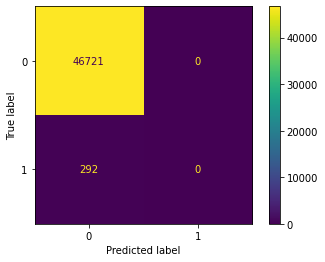

In [46]:
# Confusion Matrix
# Due to the extreme inbalance, an unweighted model predicts 0 foreign pregnancies
# An unweighted model therefore scores extremely high on unbalanced accuracy and extremely poor on balanced accuracy
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_no_weights, X_test, y_test)

## *class_weights using the distribution of the y variables*

In [54]:
# Optimized class weights based on the distribution of the y variables
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y)
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
class_weights

array([ 0.50297422, 84.5557554 ])

In [55]:
# Implement provided ideal weights into Logistic Regression Model
classifier_class_weights = LogisticRegression(max_iter= 1500, class_weight={0:class_weights[0],1:class_weights[1]})
classifier_class_weights.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.502974216326094, 1: 84.55575539568345},
                   max_iter=1500)

In [57]:
# LogisticRegression .score for the unweighted model for accuracy metrics
# score is still high but not necessarily problematic (lower than unweighted)
classifier_class_weights.score(X_test, y_test)

0.8606555633548167

In [58]:
# Using 'balanced accuracy' metric (for binary and multiclass classification problems with imbalanced datasets)
# Definition: Average of recall obtained on each class
# Unweighted balanced accuracy is high and much better than the performance of the unweighted model 
 
from sklearn.metrics import balanced_accuracy_score

target_predicted = classifier_class_weights.predict(X_test)

balanced_accuracy = balanced_accuracy_score(y_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy:.2f}")

Balanced accuracy: 0.84


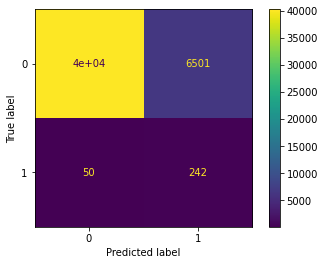

In [60]:
# Confusion Matrix shows much improved numbers
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_class_weights, X_test, y_test)

### Precision-Recall Curves



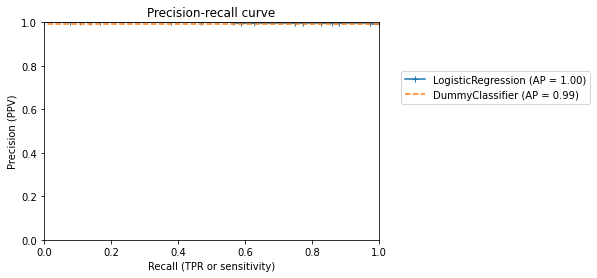

In [61]:
# Precision-Recall Curve
# reflects the high basic score of the dummy model (due to very inbalanced classes), however our weighted model still performs better
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(
    classifier_class_weights, X_test, y_test, pos_label= 0,
    marker="+")
disp = PrecisionRecallDisplay.from_estimator(
    dummy_classifier, X_test, y_test, pos_label= 0,
    color="tab:orange", linestyle="--", ax=disp.ax_)
plt.xlabel("Recall (TPR or sensitivity)")
plt.ylabel("Precision (PPV)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")

###Receiver Operating Characteristic (ROC) Curve

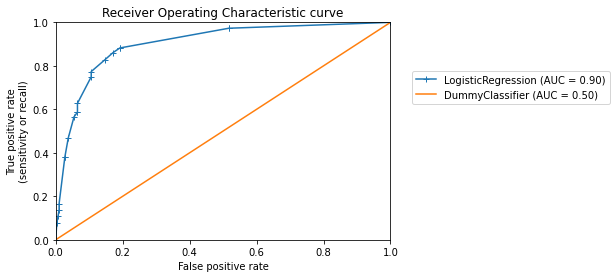

In [63]:
# Receiver Operating Characteristic (ROC) Curve
# probability threshold varies for determining prediction and compute the metrics
# Area under the ROC (ROC-AUC) to characterize the generalization performance of our classifier (similar to precision-recall curve above)
# lower bound of the ROC-AUC is 0.5 (generalization performance of dummy classifier)
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(
    classifier_class_weights, X_test, y_test, pos_label= 0,
    marker="+")
disp = RocCurveDisplay.from_estimator(
    dummy_classifier, X_test, y_test, pos_label= 0,
    color="tab:orange", ax=disp.ax_)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate\n(sensitivity or recall)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Receiver Operating Characteristic curve")



## Undersampling and Oversampling 

In [ ]:
# Implementation of Roughly Balanced Bagging for binary problem.

# using a RandomUnderSampler or RandomOverSampler will create exactly the desired number of samples
# However, it does not follow the statistical spirit wanted in the bagging framework.

# not working in the moment

from collections import Counter
from imblearn import FunctionSampler
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import cross_validate

def roughly_balanced_bagging(X, y, replace=False):
    
    # find the minority and majority classes
    class_counts = Counter(y)
    majority_class = max(class_counts, key=class_counts.get)
    minority_class = min(class_counts, key=class_counts.get)

    # compute the number of sample to draw from the majority class using
    # a negative binomial distribution
    n_minority_class = class_counts[minority_class]
    n_majority_resampled = np.random.negative_binomial(n=n_minority_class, p=0.5)

    # draw randomly with or without replacement
    majority_indices = np.random.choice(
        np.flatnonzero(y == majority_class),
        size=n_majority_resampled,
        replace=replace,
    )
    minority_indices = np.random.choice(
        np.flatnonzero(y == minority_class),
        size=n_minority_class,
        replace=replace,
    )
    indices = np.hstack([majority_indices, minority_indices])

    return X[indices], y[indices]


# Roughly Balanced Bagging
rbb = BalancedBaggingClassifier(
    sampler=FunctionSampler(func=roughly_balanced_bagging, kw_args={"replace": True})
)
cv_results = cross_validate(rbb, X, y, scoring="balanced_accuracy")

print(f"{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}")

nan +/- nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/ensemble/_bagging.py", line 321, in fit
    return self._fit(X, y, self.max_samples, sample_weight=None)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 337, in _fit
    max_features = self.max_features * self.n_features_in_
Attri

## Best Threshold Evaluation Metric

In [ ]:
# This is only an example by now
## Another option would be to change our Evaluation Metric in accordance to the imbalance
# function to get the best threshold for maximizing F1 score for binary predictions

def bestThresshold(y_true,y_pred):
    best_thresh = None
    best_score = 0
    for thresh in np.arange(0.1, 0.501, 0.01):
        score = f1_score(y_true, np.array(y_pred)>thresh)
        if score > best_score:
            best_thresh = thresh
            best_score = score
    return best_score , best_thresh

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
 
# Train model
classifier_forest = RandomForestClassifier(random_state=123)
classifier_forest.fit(X, y)
 
# Predict on training set
pred_y_forest = classifier_forest.predict(X)
 
# Is our model still predicting just one class?
print(np.unique(pred_y_forest))
# this model is only predicting 0, which means it’s completely ignoring the minority class in favor of the majority class
 
# How's our accuracy?
print(accuracy_score(y, pred_y_forest))
 
# What about AUROC?
# Area Under ROC Curve (AUROC) represents the likelihood of your model distinguishing observations from two classes
prob_y_forest = classifier_forest.predict_proba(X)
prob_y_forest = [p[1] for p in prob_y_forest]
print(roc_auc_score(y, prob_y_forest))

[0]
0.9939378469784953
0.9101279014498238
